In [ ]:
%pip install lazypredict
%pip install seaborn
%pip install matplotlib
%pip install aif360
%pip install 'aif360[Reductions]'
%pip install 'aif360[inFairness]'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd "/content/drive/My Drive/ICSE25/Datasets/0-Shot"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/.shortcut-targets-by-id/1LT2S8Q0urcb-tqe0GnbOz0HXrCeP1_09/ICSE25/Datasets/0-Shot


In [ ]:
# Gianmario Import
%cd "/content/drive/My Drive/PhD/ICSE25/Datasets/0-Shot"

[Errno 2] No such file or directory: '/content/drive/My Drive/PhD/ICSE25/Datasets/0-Shot'
/content/drive/.shortcut-targets-by-id/1LT2S8Q0urcb-tqe0GnbOz0HXrCeP1_09/ICSE25/Datasets/0-Shot


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## K-Fold Experiments and Models Selection

LazyPredict test (without k-fold)

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

data_path = "generated2.csv"
df = pd.read_csv(data_path)
X = df.drop('Target',axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)#test size 0.2 (80/20) e random state 42
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:02<00:00, 11.91it/s]

[LightGBM] [Info] Number of positive: 389, number of negative: 415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483831 -> initscore=-0.064699
[LightGBM] [Info] Start training from score -0.064699
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.95,0.95,0.95,0.95,0.26
LGBMClassifier,0.94,0.94,0.94,0.94,0.18
BaggingClassifier,0.94,0.93,0.93,0.94,0.07
DecisionTreeClassifier,0.92,0.92,0.92,0.92,0.04
ExtraTreesClassifier,0.92,0.92,0.92,0.92,0.20
SVC,0.87,0.87,0.87,0.87,0.18
NuSVC,0.86,0.86,0.86,0.86,0.08
LabelPropagation,0.85,0.85,0.85,0.85,0.07
LabelSpreading,0.85,0.85,0.85,0.85,0.10


K-fold (k=10) cross validation, collecting Accuracy and F1-Score

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


result = pd.DataFrame(columns=["Fold","Model","Accuracy","F1-Score"], index=np.arange(270))
fold = KFold(n_splits=10, random_state=6666, shuffle=True)

counter = 0
foldcounter = 1
for train_index, test_index in fold.split(X, y):
        print("Processing Fold "+ str(foldcounter) + " ...")
        X_train, X_test, y_train, y_test = \
            X[ X.index.isin(train_index)], X[ X.index.isin(test_index)], y[train_index], y[test_index]
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train, X_test, y_train, y_test)
        for model in models[:].iterrows():
          result.loc[counter]["Fold"] = foldcounter
          result.loc[counter]["Model"] = model[0]
          result.loc[counter]["Accuracy"] = round(model[1][0],3)
          result.loc[counter]["F1-Score"] = round(model[1][3],3)
          counter += 1
          foldcounter += 1

result

Processing Fold 1 ...


 90%|████████▉ | 26/29 [00:04<00:00,  4.51it/s]

[LightGBM] [Info] Number of positive: 449, number of negative: 456
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 905, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496133 -> initscore=-0.015470
[LightGBM] [Info] Start training from score -0.015470
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

100%|██████████| 29/29 [00:04<00:00,  6.10it/s]


Processing Fold 27 ...


 90%|████████▉ | 26/29 [00:05<00:00,  6.13it/s]

[LightGBM] [Info] Number of positive: 431, number of negative: 474
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 905, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476243 -> initscore=-0.095099
[LightGBM] [Info] Start training from score -0.095099
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

100%|██████████| 29/29 [00:05<00:00,  4.90it/s]


Processing Fold 53 ...


100%|██████████| 29/29 [00:05<00:00,  5.79it/s]

[LightGBM] [Info] Number of positive: 438, number of negative: 467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 905, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483978 -> initscore=-0.064110
[LightGBM] [Info] Start training from score -0.064110
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Processing Fold 79 ...


 97%|█████████▋| 28/29 [00:05<00:00,  5.96it/s]

[LightGBM] [Info] Number of positive: 439, number of negative: 466
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 905, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485083 -> initscore=-0.059686
[LightGBM] [Info] Start training from score -0.059686
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

100%|██████████| 29/29 [00:05<00:00,  4.96it/s]


Processing Fold 105 ...


100%|██████████| 29/29 [00:06<00:00,  4.67it/s]


[LightGBM] [Info] Number of positive: 439, number of negative: 466
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 905, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485083 -> initscore=-0.059686
[LightGBM] [Info] Start training from score -0.059686
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

 90%|████████▉ | 26/29 [00:04<00:00,  6.85it/s]

[LightGBM] [Info] Number of positive: 447, number of negative: 458
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 905, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493923 -> initscore=-0.024311
[LightGBM] [Info] Start training from score -0.024311
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

100%|██████████| 29/29 [00:04<00:00,  6.25it/s]


Processing Fold 157 ...


100%|██████████| 29/29 [00:04<00:00,  6.27it/s]


[LightGBM] [Info] Number of positive: 436, number of negative: 470
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 906, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.481236 -> initscore=-0.075090
[LightGBM] [Info] Start training from score -0.075090
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

100%|██████████| 29/29 [00:03<00:00,  9.00it/s]


[LightGBM] [Info] Number of positive: 429, number of negative: 477
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 906, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473510 -> initscore=-0.106060
[LightGBM] [Info] Start training from score -0.106060
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

100%|██████████| 29/29 [00:02<00:00, 13.29it/s]


[LightGBM] [Info] Number of positive: 441, number of negative: 465
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 906, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486755 -> initscore=-0.052993
[LightGBM] [Info] Start training from score -0.052993
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

100%|██████████| 29/29 [00:02<00:00, 13.49it/s]

[LightGBM] [Info] Number of positive: 443, number of negative: 463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 906, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488962 -> initscore=-0.044157
[LightGBM] [Info] Start training from score -0.044157
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

,Fold,Model,Accuracy,F1-Score
0,1,LGBMClassifier,0.95,0.95
1,2,RandomForestClassifier,0.93,0.93
2,3,BaggingClassifier,0.93,0.93
3,4,ExtraTreesClassifier,0.90,0.90
4,5,LabelSpreading,0.89,0.89
...,...,...,...,...
265,NaN,NaN,NaN,NaN
266,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN


In [ ]:
print(result.groupby('Model', as_index=False)['Accuracy'].mean().sort_values(by='Accuracy', ascending=False))

                            Model Accuracy
21         RandomForestClassifier     0.95
10                 LGBMClassifier     0.94
1               BaggingClassifier     0.94
7            ExtraTreesClassifier     0.93
4          DecisionTreeClassifier     0.92
25                            SVC     0.89
17                          NuSVC     0.88
11               LabelPropagation     0.87
12                 LabelSpreading     0.87
6             ExtraTreeClassifier     0.86
9            KNeighborsClassifier     0.84
15             LogisticRegression     0.82
14                      LinearSVC     0.81
23              RidgeClassifierCV     0.81
0              AdaBoostClassifier     0.81
3          CalibratedClassifierCV     0.81
13     LinearDiscriminantAnalysis     0.81
22                RidgeClassifier     0.81
8                      GaussianNB     0.77
16                NearestCentroid     0.75
2                     BernoulliNB     0.75
24                  SGDClassifier     0.75
18    Passi

In [ ]:
print(result.groupby('Model', as_index=False)['F1-Score'].mean().sort_values(by='F1-Score', ascending=False))

                            Model F1-Score
21         RandomForestClassifier     0.95
10                 LGBMClassifier     0.94
1               BaggingClassifier     0.94
7            ExtraTreesClassifier     0.93
4          DecisionTreeClassifier     0.92
25                            SVC     0.89
17                          NuSVC     0.88
11               LabelPropagation     0.87
12                 LabelSpreading     0.87
6             ExtraTreeClassifier     0.86
9            KNeighborsClassifier     0.84
15             LogisticRegression     0.82
14                      LinearSVC     0.81
23              RidgeClassifierCV     0.81
0              AdaBoostClassifier     0.81
3          CalibratedClassifierCV     0.81
13     LinearDiscriminantAnalysis     0.81
22                RidgeClassifier     0.81
8                      GaussianNB     0.77
16                NearestCentroid     0.75
2                     BernoulliNB     0.75
18    PassiveAggressiveClassifier     0.74
24         

The 5 best results are provided by:

- RandomForestClassifier (Accuracy: 0.98, F1: 0.98)
- asdasd
- asdasd

## HyperParameter Optimization

### GridSearchCV - ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

data_path = "generated2.csv"
dataset = pd.read_csv(data_path)
X = df.drop('Target',axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)#test size 0.2 (80/20) e random state 42


In [ ]:

model = ExtraTreesClassifier(n_jobs=-1, random_state=0)

param_grid = {
                'max_depth': [5, 10, 25, 50],
                'min_samples_leaf' : [3, 5, 10],
                'criterion' : ["gini", "entropy"]
             }


precision_scorer = make_scorer(precision_score, zero_division=0)
custom_scoring = {"accuracy": "accuracy", "precision": precision_scorer, "recall": "recall", "f1": "f1"}

grid_extratrees = GridSearchCV(model, param_grid, refit = 'accuracy', verbose = 3, scoring=custom_scoring, cv=10)

#CARLO METTI ENCODER QUA
categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False )


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # Lascia le altre colonne inalterate
)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
# fitting the model for grid search
grid_extratrees.fit(X_train, y_train)


# print best parameter after tuning
print(grid_extratrees.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_extratrees.best_estimator_)

grid_extratrees.score(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10] END criterion=gini, max_depth=5, min_samples_leaf=3; accuracy: (test=0.704) f1: (test=0.714) precision: (test=0.714) recall: (test=0.714) total time=   0.2s
[CV 2/10] END criterion=gini, max_depth=5, min_samples_leaf=3; accuracy: (test=0.802) f1: (test=0.814) precision: (test=0.795) recall: (test=0.833) total time=   0.2s
[CV 3/10] END criterion=gini, max_depth=5, min_samples_leaf=3; accuracy: (test=0.741) f1: (test=0.747) precision: (test=0.756) recall: (test=0.738) total time=   0.2s
[CV 4/10] END criterion=gini, max_depth=5, min_samples_leaf=3; accuracy: (test=0.753) f1: (test=0.767) precision: (test=0.750) recall: (test=0.786) total time=   0.2s
[CV 5/10] END criterion=gini, max_depth=5, min_samples_leaf=3; accuracy: (test=0.787) f1: (test=0.790) precision: (test=0.800) recall: (test=0.780) total time=   0.2s
[CV 6/10] END criterion=gini, max_depth=5, min_samples_leaf=3; accuracy: (test=0.775) f1: (test=0.757)

0.9751243781094527

Best ExtraTreesClassifier(criterion='entropy', max_depth=25, min_samples_leaf=3,
                     n_jobs=-1, random_state=0)

##GridSearch RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1, random_state=0)

# Definire la griglia dei parametri per RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


precision_scorer = make_scorer(precision_score, zero_division=0)
custom_scoring = {"accuracy": "accuracy", "precision": precision_scorer, "recall": "recall", "f1": "f1"}

grid_extratrees = GridSearchCV(model, param_grid, refit = 'accuracy', verbose = 3, scoring=custom_scoring, cv=10)

#CARLO METTI ENCODER QUA
categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']


grid_rf = GridSearchCV(model, param_grid, refit='accuracy', verbose=3, scoring=custom_scoring, cv=10)

# Fitting the model for grid search
grid_rf.fit(X_train, y_train)

# Stampare i migliori parametri dopo la ricerca
print(grid_rf.best_params_)

# Stampare il miglior stimatore dopo la ricerca
print(grid_rf.best_estimator_)

# Calcolare il punteggio sul training set
print(grid_rf.score(X_train, y_train))


Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[CV 1/10] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.728) f1: (test=0.738) precision: (test=0.738) recall: (test=0.738) total time=   0.3s
[CV 2/10] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.790) f1: (test=0.809) precision: (test=0.766) recall: (test=0.857) total time=   0.2s
[CV 3/10] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.778) f1: (test=0.791) precision: (test=0.773) recall: (test=0.810) total time=   0.3s
[CV 4/10] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.790) f1: (test=0.809) precision: (test=0.766) recall: (test=0.857) total time=   0.3s
[CV 5/10] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy:

Best RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=0)

##GridSearch LGBMClassifier  

In [ ]:
from lightgbm import LGBMClassifier


# Definire il modello
model = LGBMClassifier(random_state=0, n_jobs=-1)

# Definire la griglia dei parametri per LGBMClassifier
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [5, 10, 25],  # -1 per nessun limite
    'model__learning_rate': [0.01, 0.05],
    'model__num_leaves': [31, 50, 75],
    'model__min_child_samples': [10, 20, 30],
    'model__subsample': [0.6, 0.8],
    'model__colsample_bytree': [0.6, 0.8],
    'model__reg_alpha': [0],
    'model__reg_lambda': [0]
}

# Definire i punteggi di valutazione
precision_scorer = make_scorer(precision_score, zero_division=0)
custom_scoring = {"accuracy": "accuracy", "precision": precision_scorer, "recall": "recall", "f1": "f1"}

# Definire l'encoder OneHot
one_hot_encoder = OneHotEncoder()

# Definire le caratteristiche categoriali
categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']


# Configurare GridSearchCV
grid_lgbm = GridSearchCV(model, param_grid, refit='accuracy', verbose=3, scoring=custom_scoring, cv=10)

# Fitting the model for grid search
grid_lgbm.fit(X_train, y_train)

# Stampare i migliori parametri dopo la ricerca
print(grid_lgbm.best_params_)

# Stampare il miglior stimatore dopo la ricerca
print(grid_lgbm.best_estimator_)

# Calcolare il punteggio sul training set
print(grid_lgbm.score(X_train, y_train))


Output streaming troncato alle ultime 5000 righe.
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__min_child_samples
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__reg_alpha
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__reg_lambda
[LightGBM] [Warning] Unknown parameter: model__colsample_bytree
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__min_child_samples
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Info] Number of positive: 350, number of negative: 373
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
An

Best LGBMClassifier(model__colsample_bytree=0.6, model__learning_rate=0.01,
               model__max_depth=5, model__min_child_samples=10,
               model__n_estimators=100, model__num_leaves=31,
               model__reg_alpha=0, model__reg_lambda=0, model__subsample=0.6,
               n_jobs=-1, random_state=0)
              

##GridSearch BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


# Definisci il preprocessore per le features categoriche
categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']
one_hot_encoder = OneHotEncoder()


# Definisci il modello base per il BaggingClassifier
base_model = DecisionTreeClassifier(random_state=0)

# Definisci il BaggingClassifier
model = BaggingClassifier(base_estimator=base_model, n_jobs=-1, random_state=0)

# Definisci la griglia dei parametri
param_grid = {
    'base_estimator__max_depth': [5, 10, 25],
    'base_estimator__min_samples_leaf': [3, 5, 10],
    'n_estimators': [10, 50, 100],
    'bootstrap': [True, False],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
}


# Definisci lo scorer personalizzato
precision_scorer = make_scorer(precision_score, zero_division=0)
custom_scoring = {"accuracy": "accuracy", "precision": precision_scorer, "recall": "recall", "f1": "f1"}

# Definisci il GridSearchCV
grid_bagging = GridSearchCV(model, param_grid, refit='accuracy', verbose=3, scoring=custom_scoring, cv=10)

# Esegui il fit del modello per la ricerca a griglia
grid_bagging.fit(X_train, y_train)

# Stampa i migliori parametri dopo il tuning
print(grid_bagging.best_params_)

# Stampa come appare il nostro modello dopo il tuning degli iperparametri
print(grid_bagging.best_estimator_)

# Calcolare il punteggio sul training set
print(grid_bagging.score(X_train, y_train))


Fitting 10 folds for each of 486 candidates, totalling 4860 fits
[CV 1/10] END base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, bootstrap=True, max_features=0.5, max_samples=0.5, n_estimators=10; accuracy: (test=0.877) f1: (test=0.886) precision: (test=0.848) recall: (test=0.929) total time=   2.0s
[CV 2/10] END base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, bootstrap=True, max_features=0.5, max_samples=0.5, n_estimators=10; accuracy: (test=0.914) f1: (test=0.916) precision: (test=0.927) recall: (test=0.905) total time=   0.1s
[CV 3/10] END base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, bootstrap=True, max_features=0.5, max_samples=0.5, n_estimators=10; accuracy: (test=0.938) f1: (test=0.940) precision: (test=0.951) recall: (test=0.929) total time=   0.0s
[CV 4/10] END base_estimator__max_depth=5, base_estimator__min_samples_leaf=3, bootstrap=True, max_features=0.5, max_samples=0.5, n_estimators=10; accuracy: (test=0.901) f1: (test=0.

Best BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=25,
                                                        min_samples_leaf=3,
                                                        random_state=0),
                  bootstrap=False, max_features=0.5, n_estimators=50, n_jobs=-1,
                  random_state=0)

##GridSearch LinearSVC

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd




# Definisci il preprocessore per le features categoriche
categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']
one_hot_encoder = OneHotEncoder()

# Definisci il modello LinearSVC
model = LinearSVC(random_state=0, max_iter=10000)

# Definisci la griglia dei parametri
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'tol': [1e-4, 1e-3, 1e-2],
    'penalty': ['l2'],  # 'l1' only if loss is 'squared_hinge' and dual is False
    'loss': ['squared_hinge'],  # 'hinge' or 'squared_hinge'
    'dual': [False]  # True for 'l2' penalty with 'squared_hinge', False for 'l1' penalty with 'squared_hinge'
}

# Definisci lo scorer personalizzato
precision_scorer = make_scorer(precision_score, zero_division=0)
custom_scoring = {"accuracy": "accuracy", "precision": precision_scorer, "recall": "recall", "f1": "f1"}

# Definisci il GridSearchCV
grid_svc = GridSearchCV(model, param_grid, refit='accuracy', verbose=3, scoring=custom_scoring, cv=10)

# Esegui il fit del modello per la ricerca a griglia
grid_svc.fit(X_train, y_train)

# Stampa i migliori parametri dopo il tuning
print(grid_svc.best_params_)

# Stampa come appare il nostro modello dopo il tuning degli iperparametri
print(grid_svc.best_estimator_)


# Calcolare il punteggio sul training set
print(grid_svc.score(X_train, y_train))


Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END C=0.01, dual=False, loss=squared_hinge, penalty=l2, tol=0.0001; accuracy: (test=0.691) f1: (test=0.691) precision: (test=0.718) recall: (test=0.667) total time=   0.0s
[CV 2/10] END C=0.01, dual=False, loss=squared_hinge, penalty=l2, tol=0.0001; accuracy: (test=0.778) f1: (test=0.795) precision: (test=0.761) recall: (test=0.833) total time=   0.0s
[CV 3/10] END C=0.01, dual=False, loss=squared_hinge, penalty=l2, tol=0.0001; accuracy: (test=0.753) f1: (test=0.762) precision: (test=0.762) recall: (test=0.762) total time=   0.0s
[CV 4/10] END C=0.01, dual=False, loss=squared_hinge, penalty=l2, tol=0.0001; accuracy: (test=0.802) f1: (test=0.818) precision: (test=0.783) recall: (test=0.857) total time=   0.0s
[CV 5/10] END C=0.01, dual=False, loss=squared_hinge, penalty=l2, tol=0.0001; accuracy: (test=0.750) f1: (test=0.750) precision: (test=0.769) recall: (test=0.732) total time=   0.0s
[CV 6/10] END C=0.01, dual=

Best LinearSVC(C=1, dual=False, max_iter=10000, random_state=0, tol=0.01)

Il modello migliore è il RandoForestClassifier

In [ ]:

import pandas as pd
import numpy as np

data_path = "generated2.csv"
dataset = pd.read_csv(data_path)
categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

# Creiamo i nomi delle colonne per le feature trasformate
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
# Creiamo i nomi delle colonne per il DataFrame finale
colonne_numeriche = ['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 'Attribute16', 'Attribute18']
feature_names = list(ohe_feature_names) + colonne_numeriche



In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=5, n_estimators=200, n_jobs=-1, random_state=0)

model.fit(X_train, y_train)
print("Shape di X_train:", X_train.shape)
print("Shape di X_test:", X_test.shape)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy = {accuracy}")

f1 = f1_score(y_test, y_pred)
print(f"F1 score = {f1}")


Shape di X_train: (804, 62)
Shape di X_test: (202, 62)
Accuracy = 0.9455445544554455
F1 score = 0.9483568075117371


In [ ]:
data_path = "/content/drive/My Drive/ICSE25/Datasets/Original/dataset_originale.csv"
dataset = pd.read_csv(data_path)
categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

X = dataset.drop('target', axis=1)
y = dataset['target']

X = preprocessor.transform(X)

In [ ]:
# Qui si vedono le performance del modello sul dataset originale
y_pred_original_dataset = model.predict(X)
accuracy = accuracy_score(y, y_pred_original_dataset)
print(f"Accuracy = {accuracy}")

f1 = f1_score(y, y_pred_original_dataset)
print(f"F1 score = {f1}")

Accuracy = 0.58
F1 score = 0.6784073506891272


##Proviamo a rimuovere tutti i duplicati dal dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

data_path = "generated2.csv"
dataset = pd.read_csv(data_path)
dataset = dataset.drop_duplicates()

categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

X = df.drop('Target', axis=1)
y = df['Target']

X_train_no_dup, X_test_no_dup, y_train_no_dup, y_test_no_dup = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_no_dup = preprocessor.transform(X_train_no_dup)
X_test_no_dup = preprocessor.transform(X_test_no_dup)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

model = RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=5, n_estimators=200, n_jobs=-1, random_state=0)


model.fit(X_train_no_dup, y_train_no_dup)

y_pred_no_dup = model.predict(X_test_no_dup)
accuracy = accuracy_score(y_test_no_dup, y_pred_no_dup)
print(f"Accuracy = {accuracy}")

f1 = f1_score(y_test_no_dup, y_pred_no_dup)
print(f"F1 score = {f1}")

[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__reg_alpha
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__reg_lambda
[LightGBM] [Warning] Unknown parameter: model__colsample_bytree
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__min_child_samples
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__reg_alpha
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__reg_lambda
[LightGBM] [Warning] Unknown parameter: model__colsample_bytree
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__m

In [ ]:
data_path = "/content/drive/My Drive/ICSE25/Datasets/Original/dataset_originale.csv"
dataset = pd.read_csv(data_path)
categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

X = dataset.drop('target', axis=1)
y = dataset['target']

X = preprocessor.transform(X)

In [ ]:
# Qui si vedono le performance del modello sul dataset originale
y_pred_original_dataset = model.predict(X)
accuracy = accuracy_score(y, y_pred_original_dataset)
print(f"Accuracy = {accuracy}")

f1 = f1_score(y, y_pred_original_dataset)
print(f"F1 score = {f1}")

[LightGBM] [Warning] Unknown parameter: model__learning_rate
[LightGBM] [Warning] Unknown parameter: model__num_leaves
[LightGBM] [Warning] Unknown parameter: model__reg_alpha
[LightGBM] [Warning] Unknown parameter: model__subsample
[LightGBM] [Warning] Unknown parameter: model__reg_lambda
[LightGBM] [Warning] Unknown parameter: model__colsample_bytree
[LightGBM] [Warning] Unknown parameter: model__min_child_samples
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
Accuracy = 0.579
F1 score = 0.676402767102229


##Vediamo somiglianza tra dataset

In [ ]:
dataset_originale = pd.read_csv("/content/drive/My Drive/ICSE25/Datasets/Original/dataset_originale.csv")
dataset_sintetico = pd.read_csv("generated2.csv")

righe_comuni = pd.merge(dataset_originale, dataset_sintetico, how='inner')

print(f"\nRighe comuni: \n{righe_comuni}\n")


num_righe_comuni = righe_comuni.shape[0]
print(f"\nNumero di righe uguali tra i due DataFrame: {num_righe_comuni}\n")


Righe comuni: 
Empty DataFrame
Columns: [Attribute1, Attribute2, Attribute3, Attribute4, Attribute5, Attribute6, Attribute7, Attribute8, Attribute9, Attribute10, Attribute11, Attribute12, Attribute13, Attribute14, Attribute15, Attribute16, Attribute17, Attribute18, Attribute19, Attribute20, target, Target]
Index: []

[0 rows x 22 columns]


Numero di righe uguali tra i due DataFrame: 0



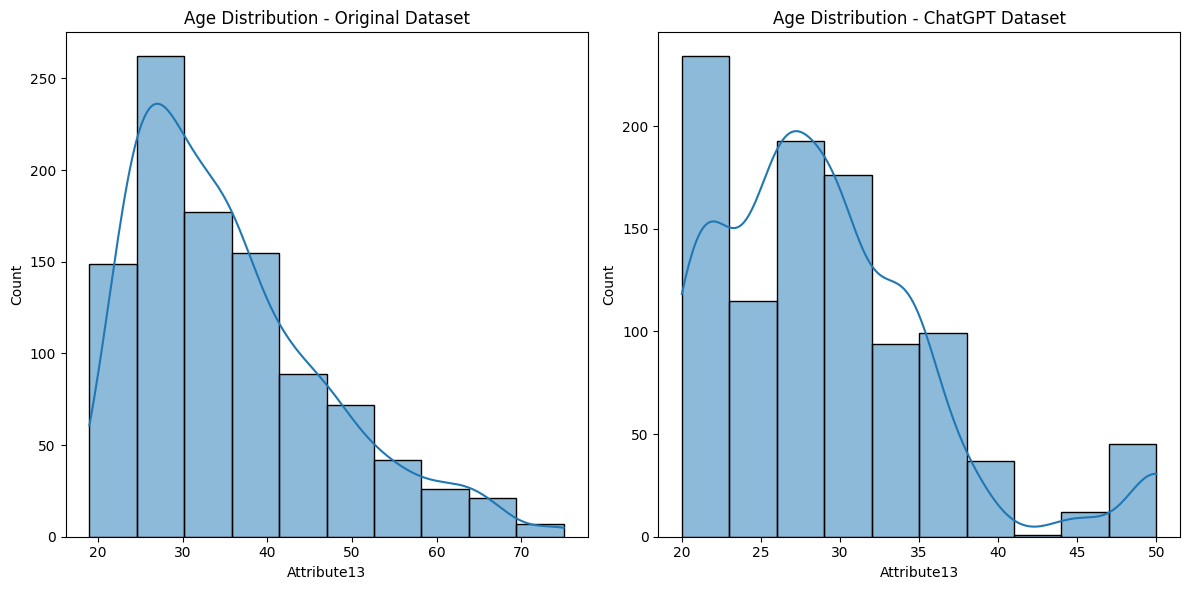

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(dataset_originale['Attribute13'], bins=10, kde=True)
plt.title('Age Distribution - Original Dataset')

plt.subplot(1, 2, 2)
sns.histplot(dataset_sintetico['Attribute13'], bins=10, kde=True)
plt.title('Age Distribution - ChatGPT Dataset')

plt.tight_layout()
plt.show()


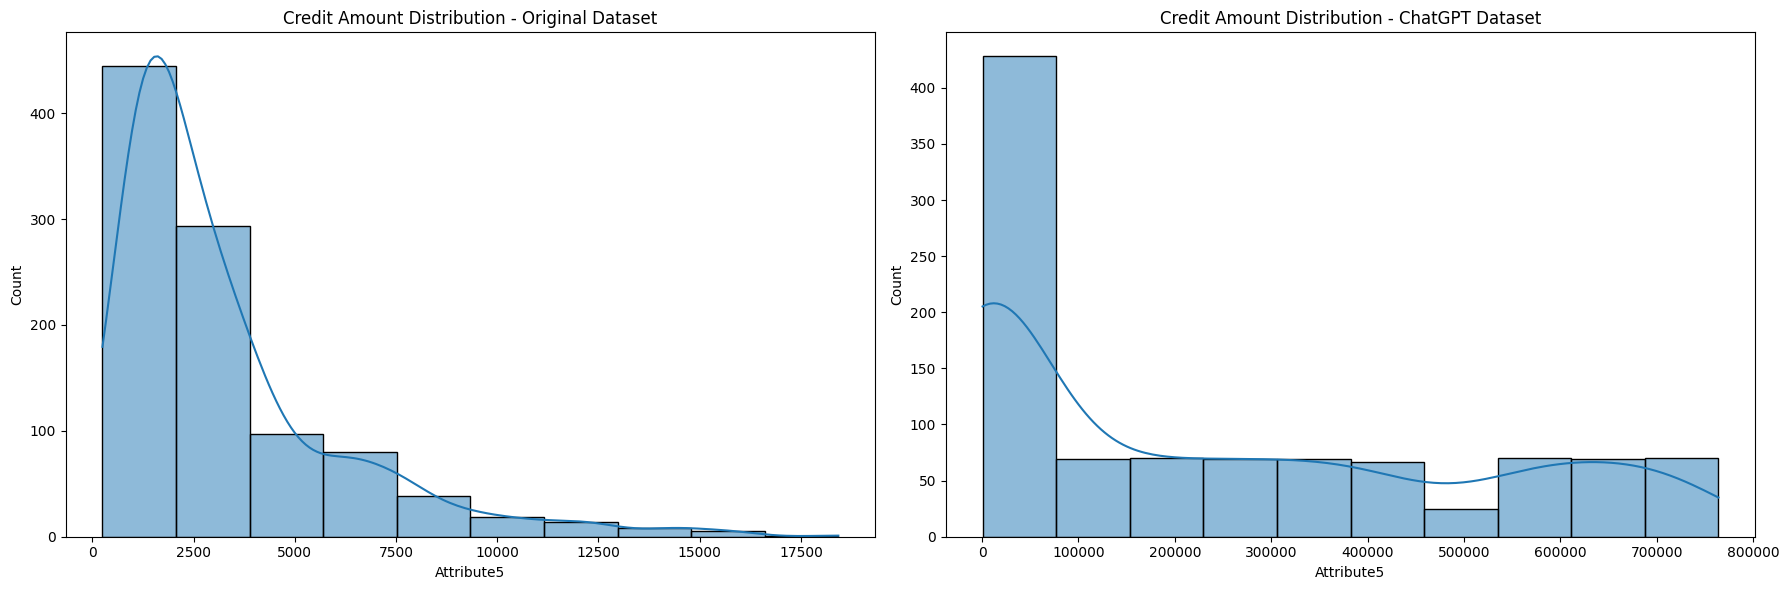

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.histplot(dataset_originale['Attribute5'], bins=10, kde=True)
plt.title('Credit Amount Distribution - Original Dataset')

plt.subplot(1, 2, 2)
sns.histplot(dataset_sintetico['Attribute5'], bins=10, kde=True)
plt.title('Credit Amount Distribution - ChatGPT Dataset')

plt.tight_layout()
plt.show()

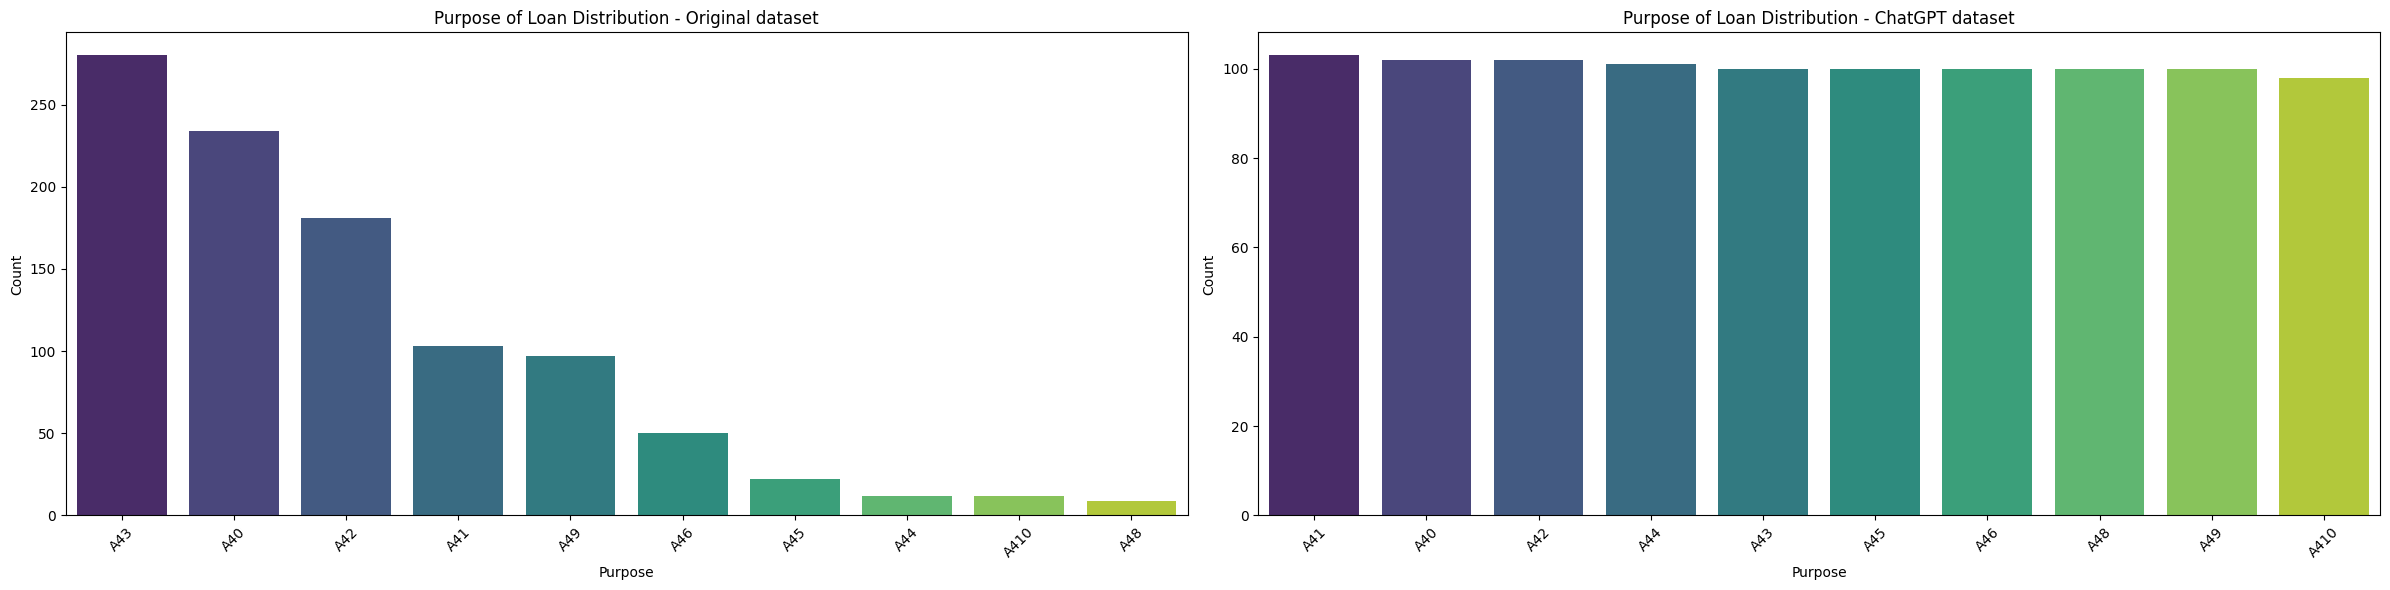

These are all the values for Purpose (Attribute4) in CHATGPT dataset: ['A40' 'A41' 'A42' 'A43' 'A44' 'A45' 'A46' 'A48' 'A49' 'A410']
These are all the values for Purpose (Attribute4) in the Original dataset: ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']


In [ ]:
plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Attribute4', data=dataset_originale, order=dataset_originale['Attribute4'].value_counts().index, palette="viridis")
plt.title('Purpose of Loan Distribution - Original dataset')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='Attribute4', data=dataset_sintetico, order=dataset_sintetico['Attribute4'].value_counts().index, palette="viridis")
plt.title('Purpose of Loan Distribution - ChatGPT dataset')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"These are all the values for Purpose (Attribute4) in CHATGPT dataset: {dataset_sintetico['Attribute4'].unique()}")
print(f"These are all the values for Purpose (Attribute4) in the Original dataset: {dataset_originale['Attribute4'].unique()}")

In [ ]:
from aif360.datasets import BinaryLabelDataset
from aif360.datasets import StandardDataset
from aif360.metrics import ClassificationMetric

"""
- Sex, privileged: Male, unprivileged: Female   | Attribute9
- Age, privileged: Old, unprivileged: Young     | Attribute13

Attribute 9:  (qualitative)
	      Personal status and sex
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
        A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single
"""

sex_features = ['Attribute9_A91','Attribute9_A92','Attribute9_A93','Attribute9_A94','Attribute9_A95'] # attributi protetti

fairness_dataset = pd.DataFrame(X_test.copy(), columns=feature_names)
fairness_dataset['target'] = y_test.to_numpy() # and join the target feature with the others

predictions = fairness_dataset
predictions['target'] = y_pred # but this time the target feature is made by the predictions of our model

# This is the object made of the original dataset
aif_sex_dataset = BinaryLabelDataset( # Base class for all structured datasets with binary labels.
        df=fairness_dataset,
        favorable_label=2.0, # This means that a prediction is biased toward the privileged attribute if its value is 2 (True)
        unfavorable_label=1.0,
        label_names=['target'],
        protected_attribute_names=sex_features,
        privileged_protected_attributes=['Attribute9_A91', 'Attribute9_A93', 'Attribute9_A94'] # here we tell AIF that we want to check for predictions that somehow privilege the attribute "sex_Male"
)

# We do the same thing but with the predictions dataset
aif_sex_pred = BinaryLabelDataset(
        df=predictions,
        favorable_label=2.0, # This means that a prediction is biased toward the privileged attribute if its value is 2 (True)
        unfavorable_label=1.0,
        label_names=['target'],
        protected_attribute_names=sex_features,
        privileged_protected_attributes=['Attribute9_A91', 'Attribute9_A93', 'Attribute9_A94'] # here we tell AIF that we want to check for predictions that somehow privilege the attribute "sex_Male"
)


sex_privileged_group = [{'Attribute9_A91':1.0,
                         'Attribute9_A92':0.0,
                         'Attribute9_A95':0.0,
                         },
                        {'Attribute9_A93':1.0,
                         'Attribute9_A92':0.0,
                         'Attribute9_A95':0.0,
                         },
                        {'Attribute9_A94':1.0,
                         'Attribute9_A92':0.0,
                         'Attribute9_A95':0.0,
                         },
                        ] # The privileged group is made of males

sex_unprivileged_group = [{'Attribute9_A92':1.0,
                         'Attribute9_A91':0.0,
                         'Attribute9_A93':0.0,
                         'Attribute9_A94':0.0,
                         },
                        {'Attribute9_A95':1.0,
                         'Attribute9_A91':0.0,
                         'Attribute9_A93':0.0,
                         'Attribute9_A94':0.0,
                         }] # The unprivileged group is made of females

# We provide the ClassificationMetric object with all the information needed:
# aif_sex_dataset - The original test set
# aif_sex_pred - A dataset containing the predictions of the model
# sex_privileged_group - The privileged group
# sex_unprivileged_group - The unprivileged group
fairness_metrics = ClassificationMetric(dataset=aif_sex_dataset,
                               classified_dataset=aif_sex_pred,
                               unprivileged_groups=sex_unprivileged_group,
                               privileged_groups=sex_privileged_group)

# Values less than 0 indicate that privileged group has higher
# proportion of predicted positive outcomes than unprivileged group.
# Value higher than 0 indicates that unprivileged group has higher proportion
# of predicted positive outcomes than privileged group.
SPD = round(fairness_metrics.statistical_parity_difference(),3)

# Measures the deviation from the equality of opportunity, which means that the same
# proportion of each population receives the favorable outcome. This measure must be equal to 0 to be fair.
EOD = round(fairness_metrics.equal_opportunity_difference(),3)

# Average of difference in False Positive Rate and True Positive Rate for unprivileged and privileged groups
# A value of 0 indicates equality of odds, which means that samples in both the privileged and unprivileged
# groups have the same probability of being classified positively.
AOD = round(fairness_metrics.average_odds_difference(),3)

print(f"Statistical Parity Difference (SPD): {SPD}.  The ideal value of this metric is 0") # The ideal value of this metric is 0
print(f"Equal Opportunity Difference (EOD): {EOD}. The ideal value is 0.")
print(f"Average Odds Difference (AOD): {AOD}. The ideal value of this metric is 0.")


Statistical Parity Difference (SPD): -0.063.  The ideal value of this metric is 0
Equal Opportunity Difference (EOD): 0.0. The ideal value is 0.
Average Odds Difference (AOD): 0.0. The ideal value of this metric is 0.
